### Dataset Preparation

In [ ]:
import pandas as pd 
from tqdm import tqdm

dataset_frame = pd.read_csv("/data/news_sources_dataset.csv")


In [ ]:
dataset_frame.head()

,title,text,authors,Topic label,url,publish_date,domain,summary,top_ps,gens_article,gensraw_article,probs_article
0,Big Tech vs The Left: How Facebook (almost) bl...,Although most of the complaints of censorship ...,['Harry Halpin'],Climate Change,https://ceasefiremagazine.co.uk/big-tech-left-...,09-30-2020,ceasefiremagazine.co.uk,Big Tech vs The Left: How Facebook (almost) bl...,[0.949999988079071],"On this podcast, Tom Lennon, a professor of hi...","[[2203, 429, 9906, 12, 4187, 37471, 12, 258, 6...","[[0.016584556549787, 0.008374096825718, 0.0036..."
1,"Tiger King, COVID-19, and the Nature of Work",(Credit: Netflix)Working for Tiger King’s Joe ...,"['Mareile Pfannebecker ', 'James A. Smith']",COVID 19,https://ceasefiremagazine.co.uk/tiger-king-cov...,05-20-2020,ceasefiremagazine.co.uk,"Tiger King, COVID-19, and the Nature of Work",[0.949999988079071],"Tiger King Coeval Revision, 2010\nReviewed by ...","[[52, 8255, 2678, 1767, 18207, 46605, 12, 3051...","[[0.06036040186882, 0.9643138051033021, 0.8816..."
2,Covid-19 is hitting Britain’s BAME communities...,In its promotion of the ‘herd immunity’ strate...,['Roxy Legane'],COVID 19,https://ceasefiremagazine.co.uk/covid-19-hitti...,04-09-2020,ceasefiremagazine.co.uk,Covid-19 is hitting Britain’s BAME communities...,[0.949999988079071],New research has revealed how white people liv...,"[[3792, 2268, 469, 4603, 704, 2331, 662, 2878,...","[[0.008890483528375001, 0.6460187435150141, 0...."
3,Too poor to stay in? State responses to COVID-...,"Over the past week, we all have seen a dramati...",['Sabrina Tucci'],COVID 19,https://ceasefiremagazine.co.uk/poor-stay-in-s...,03-22-2020,ceasefiremagazine.co.uk,Too poor to stay in? State responses to COVID-...,[0.949999988079071],The 28th General Assembly of the International...,"[[465, 2580, 401, 3612, 10007, 287, 263, 4038,...","[[0.143003180623054, 0.000192927880561, 0.3438..."
4,The cost of Covid: Britain cannot afford more ...,The Covid-19 pandemic has severely damaged the...,['Taj Ali'],COVID 19,https://ceasefiremagazine.co.uk/coronavirus-co...,10-31-2020,ceasefiremagazine.co.uk,The cost of Covid: Britain cannot afford more ...,[0.949999988079071],The Institute for Fiscal Studies (IFS) has war...,"[[465, 5137, 330, 33523, 10423, 358, 5065, 51,...","[[0.177748695015907, 0.005321775097399, 0.8184..."


In [ ]:
import numpy as np
human_articles = dataset_frame[['title', 'text']]
human_articles["label"] = np.zeros(len(human_articles))

machine_articles = dataset_frame[['title', 'gens_article']]
machine_articles["label"] = np.ones(len(machine_articles))

human_articles.columns = ['title', 'content', 'label']
machine_articles.columns = ['title', 'content', 'label']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
machine_articles["content"] = machine_articles.content.apply(lambda x: str(x))
human_articles["content"] = human_articles.content.apply(lambda x: str(x))

machine_articles["label"] = machine_articles.label.apply(lambda x: int(x))
human_articles["label"] = human_articles.label.apply(lambda x: int(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
full_dataset = human_articles.append(machine_articles)

In [ ]:
full_dataset.head()

,title,content,label
4686,MOH removes 2 Covid-19 community cases after f...,SINGAPORE - The Ministry of Health (MOH) has r...,0
1339,"As carbon recedes due to coronavirus, methane ...","By 2022, the prevalence of liquefied methane a...",1
11833,TPP slams budget report,The Cabinet’s four-page budget report on a COV...,0
11132,Recovering UK PM Johnson 'in good shape',"LONDON: British Prime Minister Boris Johnson, ...",0
7034,IFC inks deal to close gender gap in private s...,By Egufe Salaheddin\nAteras to Emaar Kingdom:\...,1


In [ ]:
full_dataset = full_dataset.sample(frac=1)

In [ ]:
full_dataset.to_csv("/content/drive/Shareddrives/DARPA/Datasets/Dataset Generation Insights/full_dataset.csv", index=False)
machine_articles.to_csv("/content/drive/Shareddrives/DARPA/Datasets/Dataset Generation Insights/machine_text.csv", index=False)
human_articles.to_csv("/content/drive/Shareddrives/DARPA/Datasets/Dataset Generation Insights/human_text.csv", index=False)

In [ ]:
full_data = pd.read_csv("/content/drive/Shareddrives/DARPA/Datasets/Dataset Generation Insights/full_dataset.csv")

train, test = train_test_split(full_data, test_size=0.3, random_state=10, shuffle=False)
test, valid = train_test_split(test, test_size=0.5, random_state=10, shuffle=False)

train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
valid_df = pd.DataFrame(valid)

In [ ]:
import pandas as pd
data_folder = "/content/drive/Shareddrives/DARPA/Datasets/Dataset Generation Insights/"
full_data = pd.read_csv(data_folder + "full_dataset.csv")

precentages = [0.05, 0.15, 0.3, 0.5, 0.75, 1]

precentages = [0.20]

for frac in precentages:
  temp_dataset = full_data.sample(frac=frac)
  print("Precentage: ", frac, " Number of samples: ", len(temp_dataset))
  print(temp_dataset[["content", "label"]].groupby("label").count())
  print("\n")

  # temp_dataset.to_csv(data_folder + "full_dataset_"+str(int(frac*100))+"pc.csv")

  data_folder = "/content/drive/Shareddrives/DARPA/Datasets/Dataset Generation Insights/Source Split/Linguistic Clusters/"

  TYPE = "inter_cluster_4_0123" ## change this as needed

  temp_dataset.to_csv(data_folder +TYPE+".csv")

  

Precentage:  0.2  Number of samples:  5771
       content
label         
0         2865
1         2905




### Source Grouping

In [ ]:
import pandas as pd 
from tqdm import tqdm


full_data = pd.read_csv("/content/drive/Shareddrives/DARPA/Datasets/Dataset Generation Insights/full_dataset_75pc.csv")

full_data.head()

,Unnamed: 0,title,content,label
0,3137,US voters go to the polls,"Reuters Television\nFort Lauderdale, Georgia –...",1
1,25685,Russia Corona vaccine: WHO says rigorous safet...,GENEVA: The World Health Organization said any...,0
2,23085,Asian cities urged to bolster defences against...,Human activity is growing more globalised and ...,1
3,21237,Egypt’s Dar al-Iftaa: Alms-giving permissible ...,CAIRO - 16 May 2020: Egypt’s Dar Al-Iftaa issu...,0
4,11833,Coronavirus: AI tool developed to detect abnor...,We have seen cases of severe underpinnings ari...,1


In [ ]:
import pandas as pd 
from tqdm import tqdm

dataset_frame = pd.read_csv("/content/drive/Shareddrives/DARPA/Datasets/Eval1Sources/eval1_sources_data.csv")


In [ ]:
import numpy as np
human_articles = dataset_frame[['title', 'text', 'domain']]
human_articles["label"] = np.zeros(len(human_articles))

machine_articles = dataset_frame[['title', 'gens_article', 'domain']]
machine_articles["label"] = np.ones(len(machine_articles))

human_articles.columns = ['title', 'content', 'domain', 'label']
machine_articles.columns = ['title', 'content', 'domain', 'label']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
machine_articles["content"] = machine_articles.content.apply(lambda x: str(x))
human_articles["content"] = human_articles.content.apply(lambda x: str(x))

machine_articles["label"] = machine_articles.label.apply(lambda x: int(x))
human_articles["label"] = human_articles.label.apply(lambda x: int(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
full_dataset = human_articles.append(machine_articles)

In [ ]:
full_dataset = full_dataset[~full_dataset.domain.str.contains("bbc.co.uk")]
full_dataset = full_dataset[~full_dataset.domain.str.contains("ceasefiremagazine.co.uk")]

In [ ]:
total_num_articles = len(full_dataset)

In [ ]:
total_num_articles

28802

In [ ]:
full_dataset.groupby(['domain']).count()

,title,content,label
domain,,,
21stcenturywire.com,514,514,514
aljazeera.com,290,290,290
americanfreepress.net,906,906,906
canadiandimension.com,338,338,338
egypttoday.com,2098,2098,2098
france24.com,918,918,918
rt.com,952,952,952
straitstimes.com,10900,10900,10900
taipeitimes.com,5662,5662,5662


In [ ]:
(full_dataset[["domain","content"]].groupby(['domain']).count()/total_num_articles)*100

,content
domain,
21stcenturywire.com,1.784598
aljazeera.com,1.006875
americanfreepress.net,3.145615
canadiandimension.com,1.173530
egypttoday.com,7.284216
france24.com,3.187279
rt.com,3.305326
straitstimes.com,37.844594
taipeitimes.com,19.658357


In [ ]:
full_dataset.groupby('domain').size().sort_values(ascending=False)

domain
straitstimes.com               10900
timesofindia.indiatimes.com     6224
taipeitimes.com                 5662
egypttoday.com                  2098
rt.com                           952
france24.com                     918
americanfreepress.net            906
21stcenturywire.com              514
canadiandimension.com            338
aljazeera.com                    290
dtype: int64

In [ ]:
size_groups = full_dataset.groupby(['domain']).size().sort_values(ascending=False)

In [ ]:
group_sizes = size_groups.index.to_list()

In [ ]:
source_group = full_dataset.groupby(['domain'])

In [ ]:
source_group

In [ ]:
data_folder = "/content/drive/Shareddrives/DARPA/Datasets/Dataset Generation Insights/Source Split/50 Percent/"

number_of_sources = 0

threshold_pc = 50

threshold_size = int(total_num_articles*0.50)

dataframe = pd.DataFrame()

for source in group_sizes:
  number_of_sources +=1

  for group in source_group:
    if source in group[0]:
      if dataframe.empty:
        dataframe = group[1]
      else:
        dataframe = dataframe.append(group[1])

      if len(dataframe) > threshold_size:
        temp_data = dataframe.sample(n=threshold_size)
        
        # print(temp_data.groupby("label").count())
        temp_data.to_csv(data_folder + "With Domain Label/full_data_" + str(number_of_sources) + "src.csv")
        temp_data[['title', 'content', 'label']].to_csv(data_folder + "full_data_" + str(number_of_sources) + "src.csv")

## Lingustic Analysis

In [ ]:
import pandas as pd 
from tqdm import tqdm

dataset_frame = pd.read_csv("/data/news_sources_dataset.csv")


In [ ]:
import numpy as np
human_articles = dataset_frame[['title', 'text', 'domain']]
human_articles["label"] = np.zeros(len(human_articles))

machine_articles = dataset_frame[['title', 'gens_article', 'domain']]
machine_articles["label"] = np.ones(len(machine_articles))

human_articles.columns = ['title', 'content', 'domain', 'label']
machine_articles.columns = ['title', 'content', 'domain', 'label']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
machine_articles["content"] = machine_articles.content.apply(lambda x: str(x))
human_articles["content"] = human_articles.content.apply(lambda x: str(x))

machine_articles["label"] = machine_articles.label.apply(lambda x: int(x))
human_articles["label"] = human_articles.label.apply(lambda x: int(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
machine_articles = machine_articles[~machine_articles.domain.str.contains("bbc.co.uk")]
machine_articles = machine_articles[~machine_articles.domain.str.contains("ceasefiremagazine.co.uk")]

human_articles = human_articles[~human_articles.domain.str.contains("bbc.co.uk")]
human_articles = human_articles[~human_articles.domain.str.contains("ceasefiremagazine.co.uk")]

## Statistics

**Human Articles**

In [ ]:
human_articles.groupby(['domain']).count()

,title,content,label
domain,,,
21stcenturywire.com,257,257,257
aljazeera.com,145,145,145
americanfreepress.net,453,453,453
canadiandimension.com,169,169,169
egypttoday.com,1049,1049,1049
france24.com,459,459,459
rt.com,476,476,476
straitstimes.com,5450,5450,5450
taipeitimes.com,2831,2831,2831


In [ ]:
source_group = human_articles.groupby(['domain'])

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
import re

def word_count(text):

  tokens = word_tokenize(text)

  nonPunct = re.compile('.*[A-Za-z0-9].*')  # must contain a letter or digit
  
  filtered = [w for w in tokens if nonPunct.match(w)]

  return len(filtered)

def sentence_count(text):

  tokens = sent_tokenize(text)

  nonPunct = re.compile('.*[A-Za-z0-9].*')  # must contain a letter or digit
  
  filtered = [w for w in tokens if nonPunct.match(w)]

  return len(filtered)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
columns = ["source", "mean_wc", "mean_sc"]

data = [] 

for group in source_group:
    print(group[0])

    temp_frame = group[1]

    temp_frame["word count"] = temp_frame.content.apply(lambda x: word_count(str(x)))
    temp_frame["sentence count"] = temp_frame.content.apply(lambda x: sentence_count(str(x)))

    print("Mean word count: ", temp_frame["word count"].mean())
    print("SD word count: ", temp_frame["word count"].std())
    print("Min word count: ", temp_frame["word count"].min())

    print("Mean sentence count: ", temp_frame["sentence count"].mean())
    print("SD sentence count: ", temp_frame["sentence count"].std())
    print("Min sentence count: ", temp_frame["sentence count"].min())

    data.append([group[0], temp_frame["word count"].mean(), temp_frame["sentence count"].mean()])
    
    print()

stats_df = pd.DataFrame(data, columns=columns)
stats_df.head()

21stcenturywire.com
Mean word count:  750.5447470817121
SD word count:  1060.1899662755914
Min word count:  8
Mean sentence count:  19.15953307392996
SD sentence count:  34.47182155081348
Min sentence count:  1

aljazeera.com
Mean word count:  1086.0620689655173
SD word count:  1288.9005177793208
Min word count:  153
Mean sentence count:  13.627586206896552
SD sentence count:  16.38382706427381
Min sentence count:  1

americanfreepress.net
Mean word count:  926.644591611479
SD word count:  468.715118535206
Min word count:  15
Mean sentence count:  25.90728476821192
SD sentence count:  13.042994420450913
Min sentence count:  1

canadiandimension.com
Mean word count:  1893.4970414201184
SD word count:  1167.6685058588025
Min word count:  141
Mean sentence count:  56.94082840236686
SD sentence count:  38.14894121697652
Min sentence count:  3

egypttoday.com
Mean word count:  294.025738798856
SD word count:  264.7880333042958
Min word count:  38
Mean sentence count:  10.36701620591039
SD s

,source,mean_wc,mean_sc
0,21stcenturywire.com,750.544747,19.159533
1,aljazeera.com,1086.062069,13.627586
2,americanfreepress.net,926.644592,25.907285
3,canadiandimension.com,1893.497041,56.940828
4,egypttoday.com,294.025739,10.367016


**Machine Generated Articles**

In [ ]:
temp_frame = machine_articles

temp_frame["word count"] = temp_frame.content.apply(lambda x: word_count(str(x)))
temp_frame["sentence count"] = temp_frame.content.apply(lambda x: sentence_count(str(x)))

print("Mean word count: ", temp_frame["word count"].mean())
print("SD word count: ", temp_frame["word count"].std())
print("Min word count: ", temp_frame["word count"].min())

print("Mean sentence count: ", temp_frame["sentence count"].mean())
print("SD sentence count: ", temp_frame["sentence count"].std())
print("Min sentence count: ", temp_frame["sentence count"].min())

print()

Mean word count:  468.6853690715923
SD word count:  166.34266703255793
Min word count:  1
Mean sentence count:  18.709395180890215
SD sentence count:  7.809524183613696
Min sentence count:  1



## Readability

In [ ]:
import nltk
!pip install py-readability-metrics
!python -m nltk.downloader punkt

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from readability import Readability

In [ ]:
from collections import Counter
  
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]
    
sample_size = 10
iterations = 50 

columns = ["source", "fk_score", "f_score", "ari_score"]
data = []

for group in source_group:

    fk_score = []
    fk_grade_level = []

    f_score = []
    f_ease = []
    f_grade_levels = []

    ari_score = []
    ari_grade_levels = []

    print(group[0])

    for i in range(iterations):
      temp_frame = group[1].sample(n=sample_size)

      articles = temp_frame['content'].values.tolist()

      text = " ".join(articles)

      r = Readability(text)

      fk = r.flesch_kincaid()
      fk_score.append(fk.score)
      fk_grade_level.append(fk.grade_level)

      f = r.flesch()
      f_score.append(f.score)
      f_ease.append(f.ease)
      f_grade_levels.append(f.grade_levels)

      ari = r.ari()
      ari_score.append(ari.score)
      ari_grade_levels.append(ari.grade_levels[0])
      # print("Automated Readability Index ages", ari.ages)

    data.append([group[0], sum(fk_score)/iterations, sum(f_score)/iterations, sum(ari_score)/iterations])

    print("flesch_kincaid score:", sum(fk_score)/iterations)
    print("flesch_kincaid grade level:", fk.grade_level)


    print("Flesch Reading Ease score", sum(f_score)/iterations)
    print("Flesch Reading Ease", most_frequent(f_ease))
    print("Flesch Reading Ease grade_levels", f.grade_levels)

    print("Automated Readability Index score", sum(ari_score)/iterations)
    print("Automated Readability Index grade level", most_frequent(ari_grade_levels))
    print()


readability_df = pd.DataFrame(data, columns=columns)
readability_df.head()
  

21stcenturywire.com
flesch_kincaid score: 21.39148425879742
flesch_kincaid grade level: 23
Flesch Reading Ease score 19.486506040683267
Flesch Reading Ease very_confusing
Flesch Reading Ease grade_levels ['college_graduate']
Automated Readability Index score 24.456685223390913
Automated Readability Index grade level college_graduate

aljazeera.com
flesch_kincaid score: 35.34898497034717
flesch_kincaid grade level: 31
Flesch Reading Ease score -17.781701860328333
Flesch Reading Ease very_confusing
Flesch Reading Ease grade_levels ['college_graduate']
Automated Readability Index score 43.142639941963814
Automated Readability Index grade level college_graduate

americanfreepress.net
flesch_kincaid score: 17.648389877370548
flesch_kincaid grade level: 19
Flesch Reading Ease score 30.090843189964367
Flesch Reading Ease difficult
Flesch Reading Ease grade_levels ['college_graduate']
Automated Readability Index score 19.461954147029797
Automated Readability Index grade level college_graduate


### Lexical Richness

In [ ]:
!pip install lexicalrichness

  Created wheel for lexicalrichness: filename=lexicalrichness-0.1.3-py2.py3-none-any.whl size=8741 sha256=842d4e4ae5630e87e60531f5110c99759cccd75039ecafe756643388685168f9
  Stored in directory: /root/.cache/pip/wheels/ac/04/68/c48c4001edf1647b80b549897fd80082286ec253e343c73116
Successfully built lexicalrichness


In [ ]:
from lexicalrichness import LexicalRichness
sample_size = 10
iterations = 50 

columns = ["source", "mattr", "mtld"]
data = []

for group in source_group:

    mattr = []  # moving average type-token ratio (MATTR)
    mtld = [] # measure of Textual Lexical Diversity (MTLD)

    print(group[0])

    for i in range(iterations):
      temp_frame = group[1].sample(n=sample_size)

      articles = temp_frame['content'].values.tolist()

      text = " ".join(articles)

      lex = LexicalRichness(text)

      mattr.append(lex.mattr(window_size=25))
      mtld.append(lex.mtld(threshold=0.72))
      # print("Automated Readability Index ages", ari.ages)


    print("Moving average type-token ratio (MATTR):", sum(mattr)/iterations)
    print("Measure of Textual Lexical Diversity (MTLD)", sum(mtld)/iterations)

    data.append([group[0], sum(mattr)/iterations, sum(mtld)/iterations])
    
    print()

diversity_df = pd.DataFrame(data, columns=columns)
diversity_df.head()


## Lexical Summary

In [ ]:
temp = stats_df.set_index('source').join(readability_df.set_index('source'))

source_dataframe = temp.join(diversity_df.set_index('source'))


**Normalizing Columns**

In [ ]:
Copy_original = source_dataframe

In [ ]:
#min-max scaling
# source_dataframe["mean_wc"] = (source_dataframe["mean_wc"] - source_dataframe["mean_wc"].min()) / (source_dataframe["mean_wc"].max() - source_dataframe["mean_wc"].min())

# source_dataframe["fk_score"] = (source_dataframe["fk_score"] - source_dataframe["fk_score"].min()) / (source_dataframe["fk_score"].max() - source_dataframe["fk_score"].min())

# source_dataframe["mtld"] = (source_dataframe["mtld"] - source_dataframe["mtld"].min()) / (source_dataframe["mtld"].max() - source_dataframe["mtld"].min())

#z scaling 
source_dataframe["mean_wc"] = (source_dataframe["mean_wc"] - source_dataframe["mean_wc"].mean()) / source_dataframe["mean_wc"].std()

source_dataframe["fk_score"] = (source_dataframe["fk_score"] - source_dataframe["fk_score"].mean()) / source_dataframe["fk_score"].std()

source_dataframe["mtld"] = (source_dataframe["mtld"] - source_dataframe["mtld"].mean()) / source_dataframe["mtld"].std()


In [ ]:
source_dataframe.head()

,mean_wc,mean_sc,fk_score,f_score,ari_score,mattr,mtld
source,,,,,,,
21stcenturywire.com,-0.001467,19.159533,0.171900,18.085680,24.924388,0.906441,0.473598
aljazeera.com,0.716384,13.627586,2.330711,-22.556949,45.381364,0.909417,0.128658
americanfreepress.net,0.375305,25.907285,-0.410916,29.969100,19.441079,0.907070,0.468026
canadiandimension.com,2.443921,56.940828,-0.371978,25.621689,19.773104,0.901308,-0.317913
egypttoday.com,-0.978207,10.367016,-0.682784,32.337272,16.914204,0.881827,-2.368262


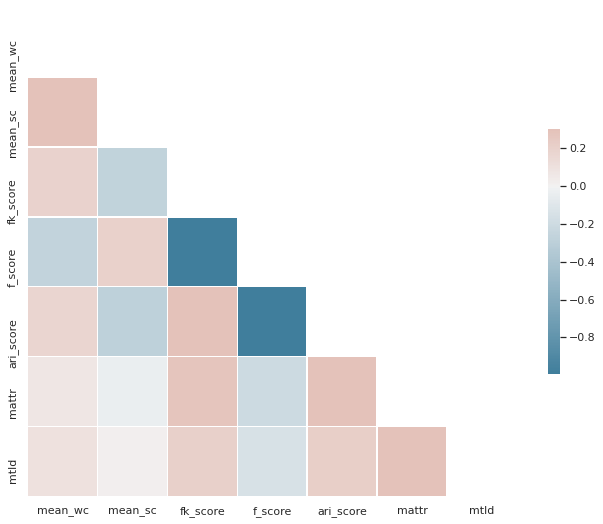

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

corr = source_dataframe.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

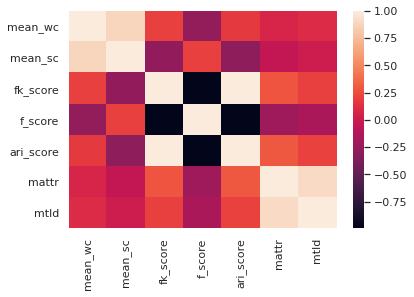

In [ ]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Clustering Sources

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import KMeans

range_n_clusters = [2, 3, 4, 5]

mat = source_dataframe[["fk_score", "mtld"]].values

for n_clusters in range_n_clusters:
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(mat)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(mat, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.3012387118610546
For n_clusters = 3 The average silhouette_score is : 0.3572657137406823
For n_clusters = 4 The average silhouette_score is : 0.31947911777526905
For n_clusters = 5 The average silhouette_score is : 0.25915490874503877


In [ ]:
# Convert DataFrame to matrix
# mat = source_dataframe[["mean_wc", "fk_score", "mtld"]].values
mat = source_dataframe[["fk_score", "mtld"]].values
# Using sklearn
km = KMeans(n_clusters=4)
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
cluster_results = pd.DataFrame([source_dataframe.index,labels]).T

In [ ]:
cluster_results.columns = ["source", "cluster"]

In [ ]:
cluster_results

,source,cluster
0,21stcenturywire.com,2
1,aljazeera.com,0
2,americanfreepress.net,2
3,canadiandimension.com,1
4,egypttoday.com,3
5,france24.com,2
6,rt.com,2
7,straitstimes.com,0
8,taipeitimes.com,1
9,timesofindia.indiatimes.com,1


In [ ]:
y_kmeans = km.predict(mat)

y_kmeans

array([2, 0, 2, 1, 3, 2, 2, 0, 1, 1], dtype=int32)

In [ ]:
km.cluster_centers_

array([[-0.2059909 ,  0.27995053],
       [-0.68278387, -2.36826195],
       [ 2.33071109,  0.12865773]])

In [ ]:
km.cluster_centers_[:,0]

array([0.80741207, 0.10773475, 0.25038101])

**Plot Source Custers**

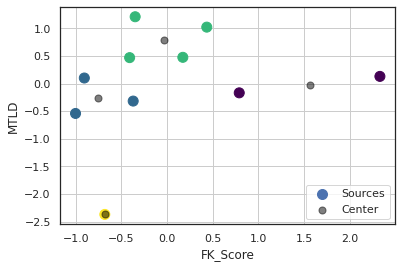

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

ax.scatter(source_dataframe.fk_score, source_dataframe.mtld, c=y_kmeans, s=100, label = "Sources", cmap='viridis')

# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = km.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5, label = "Center");

# ax.scatter(source_dataframe.fk_score, source_dataframe.mtld, s=100*source_dataframe.mean_wc, label = "Sources")

ax.legend(loc='lower right')
ax.grid(True)

plt.xlabel("FK_Score")
plt.ylabel("MTLD")

plt.show()

In [ ]:
source_dataframe

,mean_wc,mean_sc,fk_score,f_score,ari_score,mattr,mtld
source,,,,,,,
21stcenturywire.com,-0.001467,19.159533,0.171900,18.085680,24.924388,0.906441,0.473598
aljazeera.com,0.716384,13.627586,2.330711,-22.556949,45.381364,0.909417,0.128658
americanfreepress.net,0.375305,25.907285,-0.410916,29.969100,19.441079,0.907070,0.468026
canadiandimension.com,2.443921,56.940828,-0.371978,25.621689,19.773104,0.901308,-0.317913
egypttoday.com,-0.978207,10.367016,-0.682784,32.337272,16.914204,0.881827,-2.368262
france24.com,-0.542127,11.058824,0.434153,15.503908,27.979313,0.912539,1.019755
rt.com,-0.302078,17.550420,-0.350280,29.545382,20.192703,0.911225,1.207681
straitstimes.com,-0.558015,8.748257,0.789807,7.608864,31.480135,0.908922,-0.168964
taipeitimes.com,-0.412185,20.963617,-0.907233,41.863491,15.237638,0.911167,0.099250


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(mat)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(mat, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(mat, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(mat[:, 0], mat[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
cluster_groups = cluster_results.groupby("cluster")

In [ ]:
threshold_size = int(total_num_articles*0.20)

data_folder = "/content/drive/Shareddrives/DARPA/Datasets/Dataset Generation Insights/Source Split/Linguistic Clusters/"

cluster_results.to_csv(data_folder + "cluster_data.csv")

for cluster_group in cluster_groups:

  dataframe = pd.DataFrame()

  for group in source_group:

    if group[0] in cluster_group[1].source.values:
      
      if dataframe.empty:
        dataframe = group[1]
      else:
        dataframe = dataframe.append(group[1])

      if len(dataframe) > threshold_size:
        temp_data = dataframe.sample(n=threshold_size)
        
        # print(temp_data.groupby("label").count())
        temp_data.to_csv(data_folder + "With Domain Label/intra_cluster_" + str(cluster_group[0]) + ".csv")
        temp_data[['title', 'content', 'label']].to_csv(data_folder + "intra_cluster_" + str(cluster_group[0]) + ".csv")
  

In [ ]:
threshold_size = int(total_num_articles*0.20)

data_folder = "/content/drive/Shareddrives/DARPA/Datasets/Dataset Generation Insights/Source Split/Linguistic Clusters/"

cluster_results.to_csv(data_folder + "cluster_data.csv")

clusters = 0

cluster_limit = 3

cluster_no = "123"

dataframe = pd.DataFrame()

for cluster_group in cluster_groups:

  if cluster_group[0] in [0]:
    continue
  
  clusters +=1

  for group in source_group:

    if group[0] in cluster_group[1].source.values:
      
      if dataframe.empty:
        dataframe = group[1]
      else:
        dataframe = dataframe.append(group[1])

  if clusters == cluster_limit:
    temp_data = dataframe.sample(n=threshold_size, replace=False)
    
    print(temp_data.groupby("domain").count())
    temp_data.to_csv(data_folder + "With Domain Label/inter_cluster_" + str(cluster_limit) + "_" + cluster_no+ ".csv")
    temp_data[['title', 'content', 'label']].to_csv(data_folder + "inter_cluster_" + str(cluster_limit) + "_" + cluster_no+ ".csv")
  

                             title  content  label
domain                                            
21stcenturywire.com            167      167    167
americanfreepress.net          290      290    290
canadiandimension.com          103      103    103
egypttoday.com                 714      714    714
france24.com                   295      295    295
rt.com                         311      311    311
taipeitimes.com               1846     1846   1846
timesofindia.indiatimes.com   2034     2034   2034
